In [1]:
from tensorflow.keras.layers import Input, SimpleRNN, GRU, Dense, Flatten, LSTM
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
series = np.sin((0.1 * np.arange(400)) ** 2)

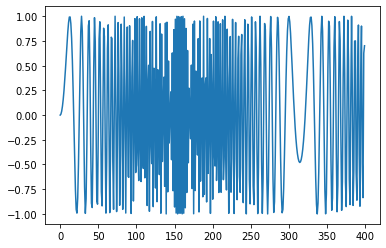

In [3]:
plt.plot(series)
plt.show()

In [4]:
# build a dataset
T = 10
D = 1
X = []
Y = []
for t in range(len(series) - T):
    x = series[t:t+T]
    X.append(x)
    y = series[t+T]
    Y.append(y)

X = np.array(X).reshape(-1 ,T) # N x T
Y = np.array(Y)
N = len(X)
print(f"X.shape:{X.shape}, Y.shape:{Y.shape}, N.length:{N}")

X.shape:(390, 10), Y.shape:(390,), N.length:390


In [5]:
# make a model
i = Input(shape = (T, ))
x = Dense(1)(i)
model = Model(i, x)
model.compile(loss='mse', optimizer=Adam(lr=0.01))

2022-03-16 13:23:39.110680: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [6]:
# train the MODEL
r = model.fit(
    X[:-N//2], Y[:-N//2], 
    epochs=80, 
    validation_data=(X[-N//2:], Y[-N//2:])
)

Epoch 1/80
7/7 [==============================] - 0s 18ms/step - loss: 1.6010 - val_loss: 0.9953
Epoch 2/80
7/7 [==============================] - 0s 5ms/step - loss: 1.3558 - val_loss: 0.9336
Epoch 3/80
7/7 [==============================] - 0s 5ms/step - loss: 1.1711 - val_loss: 0.8839
Epoch 4/80
7/7 [==============================] - 0s 5ms/step - loss: 1.0224 - val_loss: 0.8288
Epoch 5/80
7/7 [==============================] - 0s 5ms/step - loss: 0.9039 - val_loss: 0.7793
Epoch 6/80
7/7 [==============================] - 0s 5ms/step - loss: 0.8097 - val_loss: 0.7405
Epoch 7/80
7/7 [==============================] - 0s 4ms/step - loss: 0.7315 - val_loss: 0.7070
Epoch 8/80
7/7 [==============================] - 0s 5ms/step - loss: 0.6744 - val_loss: 0.6858
Epoch 9/80
7/7 [==============================] - 0s 5ms/step - loss: 0.6248 - val_loss: 0.6688
Epoch 10/80
7/7 [==============================] - 0s 6ms/step - loss: 0.5933 - val_loss: 0.6555
Epoch 11/80
7/7 [=====================

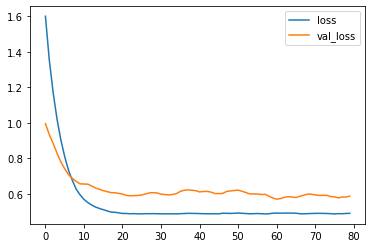

In [7]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [9]:
outputs = model.predict(X)
print(outputs.shape)

(390, 1)


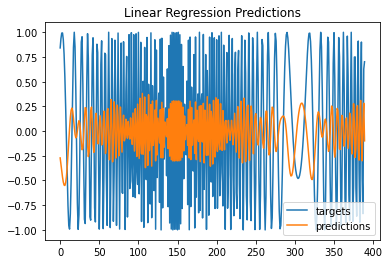

In [10]:
predictions = outputs[:,0]
plt.plot(Y, label='targets')
plt.plot(predictions, label='predictions')
plt.title("Linear Regression Predictions")
plt.legend()
plt.show()

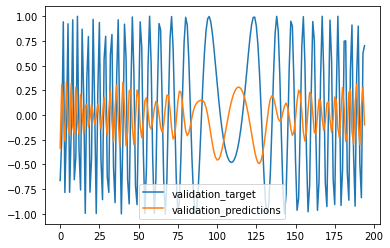

In [11]:
# Wrong forecast using true targets
validation_target = Y[-N//2:]
validation_predictions = []

i = -N//2 

while len(validation_predictions) < len(validation_target):
    p = model.predict(X[i].reshape(1, -1, 1))[0,0]
    i += 1
    
    validation_predictions.append(p)

plt.plot(validation_target, label='validation_target')
plt.plot(validation_predictions, label='validation_predictions')
plt.legend()

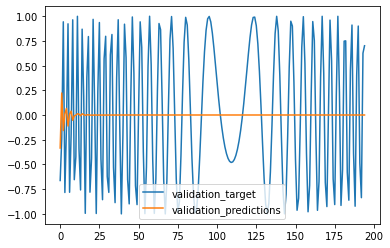

In [12]:
# Forecast future values
validation_target = Y[-N//2:]
validation_predictions = []

# last train input
last_x = X[-N//2]  

while len(validation_predictions) < len(validation_target):
    p = model.predict(last_x.reshape(1, -1, 1))[0,0]
    
    validation_predictions.append(p)
    
    last_x = np.roll(last_x, -1)
#     print(last_x)
    last_x[-1] = p

plt.plot(validation_target, label='validation_target')
plt.plot(validation_predictions, label='validation_predictions')
plt.legend()

### RNN

In [15]:
### build a RNN model
X = X.reshape(-1, T, 1) # N x T x D

i = Input(shape = (T, D))
x = SimpleRNN(10)(i)
x = Dense(1)(x)
model = Model(i, x)
model.compile(loss='mse', optimizer=Adam(lr=0.05))

/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [18]:
### train the RNN
r = model.fit(
    X[:-N//2], Y[:-N//2], 
    batch_size=32,
    epochs=200, 
    validation_data=(X[-N//2:], Y[-N//2:])
)

Epoch 1/200
7/7 [==============================] - 1s 31ms/step - loss: 0.5980 - val_loss: 0.6767
Epoch 2/200
7/7 [==============================] - 0s 7ms/step - loss: 0.4772 - val_loss: 0.5433
Epoch 3/200
7/7 [==============================] - 0s 7ms/step - loss: 0.4599 - val_loss: 0.5491
Epoch 4/200
7/7 [==============================] - 0s 7ms/step - loss: 0.4679 - val_loss: 0.5760
Epoch 5/200
7/7 [==============================] - 0s 9ms/step - loss: 0.4620 - val_loss: 0.5301
Epoch 6/200
7/7 [==============================] - 0s 21ms/step - loss: 0.3875 - val_loss: 0.5553
Epoch 7/200
7/7 [==============================] - 0s 13ms/step - loss: 0.3272 - val_loss: 0.4222
Epoch 8/200
7/7 [==============================] - 0s 10ms/step - loss: 0.2575 - val_loss: 0.3160
Epoch 9/200
7/7 [==============================] - 0s 7ms/step - loss: 0.2320 - val_loss: 0.3285
Epoch 10/200
7/7 [==============================] - 0s 6ms/step - loss: 0.2084 - val_loss: 0.2947
Epoch 11/200
7/7 [=======

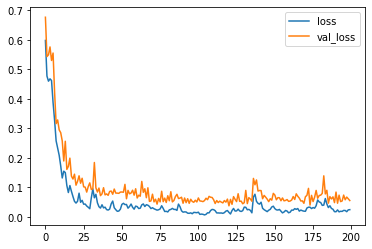

In [19]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

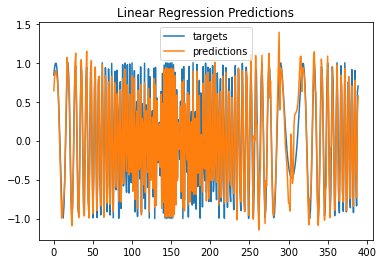

In [20]:
outputs = model.predict(X)
predictions = outputs[:,0]

plt.plot(Y, label='targets')
plt.plot(predictions, label='predictions')
plt.title("Linear Regression Predictions")
plt.legend()
plt.show()

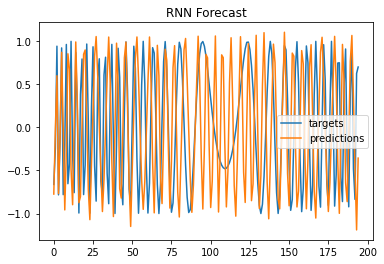

In [21]:
forecast = []
_input = X[-N//2]

while len(forecast) < len(Y[-N//2:]):
    f = model.predict(_input.reshape(1, T, 1))[0,0]
    forecast.append(f)
    
    _input = np.roll(_input, -1)
    _input[-1] = f

plt.plot(Y[-N//2:], label='targets')
plt.plot(forecast, label='predictions')
plt.title("RNN Forecast")
plt.legend()
plt.show()

### LSTM

In [22]:
### build a LSTM model
X = X.reshape(-1, T, 1) # N x T x D

i = Input(shape = (T, D))
x = LSTM(10)(i)
x = Dense(1)(x)
model = Model(i, x)
model.compile(loss='mse', optimizer=Adam(lr=0.05))

/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [23]:
### train the LSTM model
r = model.fit(
    X[:-N//2], Y[:-N//2], 
    batch_size=32,
    epochs=200, 
    validation_data=(X[-N//2:], Y[-N//2:])
)

Epoch 1/200
7/7 [==============================] - 2s 72ms/step - loss: 0.5178 - val_loss: 0.6171
Epoch 2/200
7/7 [==============================] - 0s 10ms/step - loss: 0.4999 - val_loss: 0.6130
Epoch 3/200
7/7 [==============================] - 0s 13ms/step - loss: 0.4491 - val_loss: 0.5485
Epoch 4/200
7/7 [==============================] - 0s 12ms/step - loss: 0.4024 - val_loss: 0.5297
Epoch 5/200
7/7 [==============================] - 0s 12ms/step - loss: 0.3036 - val_loss: 0.3273
Epoch 6/200
7/7 [==============================] - 0s 12ms/step - loss: 0.2741 - val_loss: 0.5612
Epoch 7/200
7/7 [==============================] - 0s 12ms/step - loss: 0.2221 - val_loss: 0.2248
Epoch 8/200
7/7 [==============================] - 0s 10ms/step - loss: 0.1673 - val_loss: 0.2798
Epoch 9/200
7/7 [==============================] - 0s 11ms/step - loss: 0.1165 - val_loss: 0.1864
Epoch 10/200
7/7 [==============================] - 0s 10ms/step - loss: 0.0821 - val_loss: 0.1597
Epoch 11/200
7/7 [=

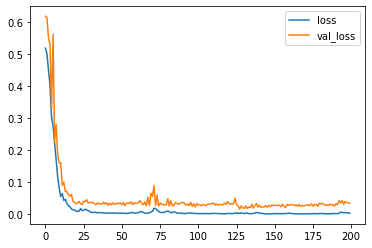

In [24]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

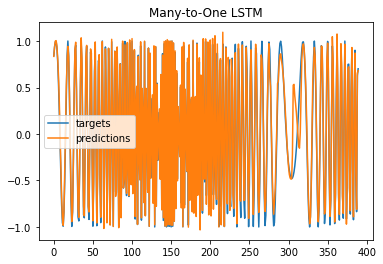

In [25]:
outputs = model.predict(X)
predictions = outputs[:,0]

plt.plot(Y, label='targets')
plt.plot(predictions, label='predictions')
plt.title("Many-to-One LSTM")
plt.legend()
plt.show()

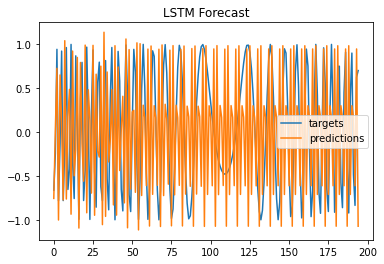

In [26]:
forecast = []
_input = X[-N//2]

while len(forecast) < len(Y[-N//2:]):
    f = model.predict(_input.reshape(1, T, 1))[0,0]
    forecast.append(f)
    
    _input = np.roll(_input, -1)
    _input[-1] = f

plt.plot(Y[-N//2:], label='targets')
plt.plot(forecast, label='predictions')
plt.title("LSTM Forecast")
plt.legend()
plt.show()